In [ ]:
#IMPORTING LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
cf.go_offline();
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings ("ignore")
warnings.warn("this will not show") 
pd.set_option('display.max_columns', None)

In [ ]:
# LOAD THE DATASET

In [3]:
df = pd.read_csv(r"C:\Users\Teesa\OneDrive\Desktop\amazon.csv")
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0


In [ ]:
# DATA SORTING AND CLEANING

In [5]:
df = df.sort_values("wilson_lower_bound", ascending = False)
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


In [ ]:
# MISSING VALUE ANALYSIS

In [7]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True) 
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0]* 100).sort_values (ascending=True) 
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis = 1, keys = ['Missing Values', 'Ratio']) 
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_dataframe (df, head=5, tail=5):

    print("SHAPE".center(82, '~'))
    print('Rows: {}'.format(df.shape[0]))
    print('columns: {}'.format(df.shape[1]))
    
    print("TYPES".center (82, '~'))
    print(df.dtypes)
    
    print("".center (82, '~'))
    print(missing_values_analysis(df))
    
    print('DUPLICATED VALUES'.center (83, '~'))
    print(df.duplicated().sum())
    
    print("QUANTILES".center(82, '~'))
    numeric_df = df.select_dtypes(include='number')
    print(numeric_df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_dataframe(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 4915
columns: 11
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
reviewerName             object
overall                   int64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              Missing Values  Ratio
reviewerName               1   0.02
reviewText                 1   0.02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                       0.00  0.05   0.50        0.95       0.99         1.00
overall 

In [ ]:
# CHECKING UNIQUE CLASSES IN DATAFRAME

In [9]:
def check_class(dataframe):
    nunique_df = pd.DataFrame({'Variable': dataframe.columns,
                                'Classes': [dataframe[i].nunique() \
                                            for i in dataframe.columns]})
    nunique_df = nunique_df.sort_values('Classes', ascending = False) 
    nunique_df = nunique_df.reset_index(drop = True)
    return nunique_df

check_class(df)

,Variable,Classes
0,reviewText,4912
1,reviewerName,4594
2,reviewTime,690
3,day_diff,690
4,wilson_lower_bound,40
5,score_average_rating,28
6,score_pos_neg_diff,27
7,total_vote,26
8,helpful_yes,23
9,helpful_no,17


In [ ]:
# Visualizing Categorical Variables

In [11]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

constraints = ['#B34D22', '#EBE00C', '#FEB00C', '#0C92EB', '#EBC0D5']
def categorical_variable_summary(df, column_name):
    fig = make_subplots (rows = 1, cols = 2,
                         subplot_titles = ('Countplot', 'Percentage'), 
                         specs = [[{"type": "xy"}, {"type": "domain"}]])

    fig.add_trace(go.Bar(y = df[column_name].value_counts().values.tolist(), 
                         x = [str(i) for i in df[column_name].value_counts().index], 
                         text = df[column_name].value_counts().values.tolist(),
                         textfont = dict(size = 14), 
                         name = column_name,
                         textposition = 'auto',
                         showlegend = False,
                         marker = dict(color = constraints,
                                       line = dict(color = '#DBE6EC', 
                                                   width = 1))),
                  row = 1, col = 1)

    fig.add_trace(go.Pie(labels = df[column_name].value_counts().keys(),
                         values = df[column_name].value_counts().values,
                         textfont = dict(size = 14),
                         textposition = 'auto',
                         showlegend = False, 
                         name = column_name,
                         marker = dict(colors = constraints)),
                  row = 1, col = 2)

    fig.update_layout(title = {'text': column_name,
                               'y': 0.9, 
                               'x': 0.5,
                               'xanchor': 'center',
                               'yanchor': 'top'},
                      template = 'plotly_white')
    fig.show()

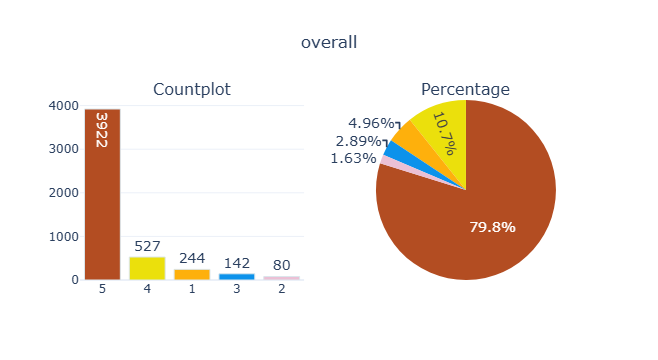

In [13]:
categorical_variable_summary(df, 'overall')

In [15]:
df.reviewText.head()

2031    [[ UPDATE - 6/19/2014 ]]So my lovely wife boug...
3449    I have tested dozens of SDHC and micro-SDHC ca...
4212    NOTE:  please read the last update (scroll to ...
317     If your card gets hot enough to be painful, it...
4672    Sandisk announcement of the first 128GB micro ...
Name: reviewText, dtype: object

In [17]:
review_example = df.reviewText[2031]
review_example

'[[ UPDATE - 6/19/2014 ]]So my lovely wife bought me a Samsung Galaxy Tab 4 for Father\'s Day and I\'ve been loving it ever since.  Just as other with Samsung products, the Galaxy Tab 4 has the ability to add a microSD card to expand the memory on the device.  Since it\'s been over a year, I decided to do some more research to see if SanDisk offered anything new.  As of 6/19/2014, their product lineup for microSD cards from worst to best (performance-wise) are the as follows:SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow, the difference between all of these cards are simply the speed in which you can read/write data to the card.  Yes, the published rating of most all these cards (except the SanDisk regular) are Class 10/UHS-I but that\'s just a rating... Actual real world performance does get better with each model, but with faster cards come more expensive prices.  Since Amazon doesn\'t carry the Ultra PLUS model of microSD card, I had 

In [19]:
review_example = re.sub("[^a-zA-Z]",'',review_example)
review_example

'UPDATESomylovelywifeboughtmeaSamsungGalaxyTabforFathersDayandIvebeenlovingiteversinceJustasotherwithSamsungproductstheGalaxyTabhastheabilitytoaddamicroSDcardtoexpandthememoryonthedeviceSinceitsbeenoverayearIdecidedtodosomemoreresearchtoseeifSanDiskofferedanythingnewAsoftheirproductlineupformicroSDcardsfromworsttobestperformancewisearetheasfollowsSanDiskSanDiskUltraSanDiskUltraPLUSSanDiskExtremeSanDiskExtremePLUSSanDiskExtremePRONowthedifferencebetweenallofthesecardsaresimplythespeedinwhichyoucanreadwritedatatothecardYesthepublishedratingofmostallthesecardsexcepttheSanDiskregularareClassUHSIbutthatsjustaratingActualrealworldperformancedoesgetbetterwitheachmodelbutwithfastercardscomemoreexpensivepricesSinceAmazondoesntcarrytheUltraPLUSmodelofmicroSDcardIhadtododirectcomparisonsbetweentheSanDiskUltraExtremeandExtremePLUSAsmentionedinmyearlierreviewIpurchasedtheSanDiskUltraformyGalaxySMyquestionwasdidIwanttopayovermoreforacardthatisfasterthantheoneIalreadyownedOrIcouldpayalmostdoubletoget

In [ ]:
#DATA CLEANING FOR REVIEW TEXT

In [31]:
rt = lambda x: re.sub("[^a-zA-Z]",' ',str(x))
df["reviewText"] = df["reviewText"].map(rt)
df["reviewText"] = df["reviewText"].str.lower()
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,update so my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,i have tested dozens of sdhc and micro sdhc ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,note please read the last update scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,if your card gets hot enough to be painful it...,09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,sandisk announcement of the first gb micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import pandas as pd

df[['polarity','subjectivity']] = df['reviewText'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in df['reviewText'].items():

    score = SentimentIntensityAnalyzer().polarity_scores(row)

    neg = score['neg']
    neu = score['neu']
    pos = score['pos']

    
    if neg > pos:
        df.loc[index, 'sentiment'] = "Negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "Positive"  
    else:
        df.loc[index, 'sentiment'] = "Neutral" 

In [35]:
df[df['sentiment'] == 'Positive'].sort_values("wilson_lower_bound",
                                              ascending = False).head(5)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
2031,"Hyoun Kim ""Faluzure""",5,update so my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544,0.163859,0.562259,Positive
3449,NLee the Engineer,5,i have tested dozens of sdhc and micro sdhc ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519,0.103870,0.516435,Positive
4212,SkincareCEO,1,note please read the last update scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139,0.212251,0.505394,Positive
317,"Amazon Customer ""Kelly""",1,if your card gets hot enough to be painful it...,09-02-2012,1033,422,73,495,349,0.852525,0.818577,0.143519,0.494207,Positive
4672,Twister,5,sandisk announcement of the first gb micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109,0.172332,0.511282,Positive


In [44]:
df[df['sentiment'] == 'Negative'].sort_values("wilson_lower_bound",
                                              ascending = False).head(5)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
3807,R. Heisler,3,i bought this card to replace a lost gig in...,27-02-2013,649,22,3,25,19,0.88,0.700442,0.194643,0.675000,Negative
1142,Daniel Pham(Danpham_X @ yahoo. com),5,as soon as i saw that this card was announced ...,04-02-2014,307,5,0,5,5,1.00,0.565518,0.058929,0.592857,Negative
938,Chris G,5,i bought the gb version of this card to incr...,14-10-2012,785,3,0,3,3,1.00,0.438503,0.000000,0.000000,Negative
1596,Erik Fisher,2,not ok with gopro hero black edition the s...,29-11-2013,374,3,0,3,3,1.00,0.438503,-0.135417,0.327083,Negative
3587,pepper45322,1,thank god for amazon return policy or i would ...,29-12-2012,709,6,2,8,4,0.75,0.409275,0.034722,0.447222,Negative


In [ ]:
# VISUALIZING SENTIMENT DISTRIBUTION

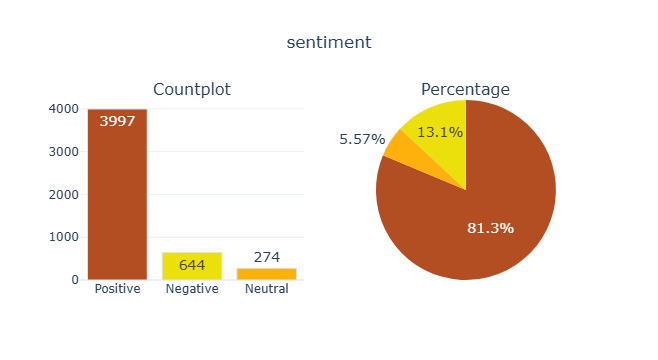

In [42]:
categorical_variable_summary(df,'sentiment')

In [46]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
data = pd.read_csv(r"C:\Users\Teesa\OneDrive\Desktop\amazon.csv")
print(data.head(10))

   Unnamed: 0                                      reviewerName  overall  \
0           0                                               NaN        4   
1           1                                              0mie        5   
2           2                                               1K3        4   
3           3                                               1m2        5   
4           4                                      2&amp;1/2Men        5   
5           5                                           2Cents!        5   
6           6                                        2K1Toaster        5   
7           7  35-year Technology Consumer "8-tracks to 802.11"        5   
8           8                                         4evryoung        5   
9           9                                          53rdcard        5   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  23-07-2014       138   
1  Purc

In [48]:
#ANALYZE THE DATASET 
print(data.isnull().sum)
data = data.dropna()         #dropna is removing null values

<bound method DataFrame.sum of       Unnamed: 0  reviewerName  overall  reviewText  reviewTime  day_diff  \
0          False          True    False       False       False     False   
1          False         False    False       False       False     False   
2          False         False    False       False       False     False   
3          False         False    False       False       False     False   
4          False         False    False       False       False     False   
...          ...           ...      ...         ...         ...       ...   
4910       False         False    False       False       False     False   
4911       False         False    False       False       False     False   
4912       False         False    False       False       False     False   
4913       False         False    False       False       False     False   
4914       False         False    False       False       False     False   

      helpful_yes  helpful_no  total_vote  s

In [50]:
print(data.describe())    #(describe function use for finding staistical values for csv file)

        Unnamed: 0      overall     day_diff  helpful_yes   helpful_no  \
count  4913.000000  4913.000000  4913.000000  4913.000000  4913.000000   
mean   2457.974761     4.587625   437.346224     1.311215     0.210258   
std    1418.447891     0.996995   209.360537    41.627627     4.024098   
min       1.000000     1.000000     1.000000     0.000000     0.000000   
25%    1230.000000     5.000000   281.000000     0.000000     0.000000   
50%    2458.000000     5.000000   431.000000     0.000000     0.000000   
75%    3686.000000     5.000000   601.000000     0.000000     0.000000   
max    4914.000000     5.000000  1064.000000  1952.000000   183.000000   

        total_vote  score_pos_neg_diff  score_average_rating  \
count  4913.000000         4913.000000           4913.000000   
mean      1.521474            1.100957              0.075363   
std      44.132066           39.375960              0.255973   
min       0.000000         -130.000000              0.000000   
25%       0.0

In [ ]:
#SENTIMENT INTENSITY ANALYZER ALGORITHM

In [52]:
sentiments = SentimentIntensityAnalyzer()

data['Positive'] = [sentiments.polarity_scores(i)["pos" ]for i in data["reviewText"]]
data['Negative'] = [sentiments.polarity_scores(i)["neg" ]for i in data["reviewText"]]
data['Neutral'] = [sentiments.polarity_scores(i)["neu" ]for i in data["reviewText"]]
print(data.head(10))

    Unnamed: 0                                      reviewerName  overall  \
1            1                                              0mie        5   
2            2                                               1K3        4   
3            3                                               1m2        5   
4            4                                      2&amp;1/2Men        5   
5            5                                           2Cents!        5   
6            6                                        2K1Toaster        5   
7            7  35-year Technology Consumer "8-tracks to 802.11"        5   
8            8                                         4evryoung        5   
9            9                                          53rdcard        5   
10          10                                         808TREX50        5   

                                           reviewText  reviewTime  day_diff  \
1   Purchased this for my device, it worked as adv...  25-10-2013       4

In [ ]:
#ACCURACY OF POLARITY SCORE

In [54]:

x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

print("Positive:",x)
print("Negative:",y)
print("Neutral:",z)

Positive: 765.547
Negative: 219.704
Neutral: 3927.776


In [58]:
def sentiment_scores(a,b,c):
    if(a>b) and (a>c):
        print("Positive")
    elif(b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")
        

In [60]:
sentiment_scores(x,y,z)

Neutral


In [64]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

# Initialize the stemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess the text
def clean_text(reviewText):
    if isinstance(reviewText, float):  # Check for float, which includes NaN
        return ""
    reviewText = re.sub(r"[^a-zA-Z\s]", "", reviewText)  # Remove punctuation
    reviewText = reviewText.lower()  # Lowercase
    words = nltk.word_tokenize(reviewText)  # Tokenize
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Remove stopwords and stem
    return " ".join(words)

# Apply cleaning function
data['cleaned_text'] = data['reviewText'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Teesa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Teesa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#FEATURE EXTRACTION 

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the cleaned text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['cleaned_text'])

# Target variable
y = data['overall']  # Ensure you have sentiment column with 0/1 or -1/1


In [ ]:
# DATA SPLITTING

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#MACHINE LEARNING MODEL

In [70]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [72]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8036622583926755
              precision    recall  f1-score   support

           1       0.71      0.19      0.29        54
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        25
           4       0.33      0.01      0.02       110
           5       0.81      1.00      0.89       780

    accuracy                           0.80       983
   macro avg       0.37      0.24      0.24       983
weighted avg       0.72      0.80      0.73       983



In [76]:
def categorize_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Create sentiment column based on the rating
data['Sentiment'] = data['overall'].apply(categorize_sentiment)

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the cleaned text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['cleaned_text'])

# Target variable
y = data['Sentiment']


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# NAIVE BAYES

In [82]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [84]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9033570701932858
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        68
     Neutral       0.00      0.00      0.00        25
    Positive       0.91      1.00      0.95       890

    accuracy                           0.90       983
   macro avg       0.30      0.33      0.32       983
weighted avg       0.82      0.90      0.86       983



In [ ]:
# CONFUSION MATRIX

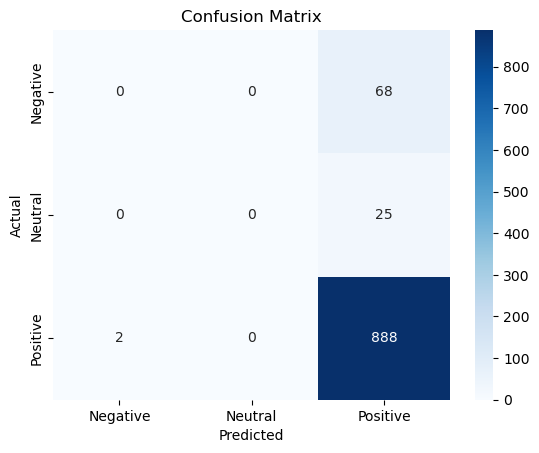

In [86]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()